(prob-models)=
# Probabilistic models

**THIS CHAPTER IS CURRENTLY UNDER CONSTRUCTION!!!**

## First examples

### Head-to-tail nodes

### Tail-to-tail nodes

### Head-to-head nodes



## DAGs and PGMs

At the most basic level, a _directed graph_ $G$ consists of two sets $V$ and $E$ of _vertices_ and _edges_. The vertices are visualized as nodes, and the edges are arrows that run between the nodes. For example, consider the following graph:

```{image} ../img/graph-01.svg
:width: 90%
:align: center
```
&nbsp;

This graph consists of five vertices and five edges:

$$
V = \{v_1,v_2,v_3,v_4,v_5\}, \quad E = \{e_1,e_2,e_3,e_4,e_5\}.
$$

Notice that this graph is _acyclic_, which means that beginning at any given node, there is no (directed) path along the edges that returns to the original node. Thus, our graph $G$ is an example of a _directed acyclic graph_, or _DAG_ for short.

If there is a directed edge $v_i \to v_j$ from a node $v_i$ to a node $v_j$, then $v_i$ is said to be a _parent_ of $v_j$ and $v_j$ is called a _child_ of $v_i$. For example, in our graph $G$ above, the set of parents of $v_4$ is $\{v_1,v_2\}$, while the set of children of $v_4$ is $\{v_5\}$.

More generally, if there exists a directed path from $v_i$ to $v_j$ of any length, say

$$
v_i \to \cdots \to v_j,
$$

then $v_j$ is called a _descendant_ of $v_i$. Thus, $v_j$ is a child of $v_i$ if there exists a directed path of length $1$. In our graph above, the node $v_5$ is a descendant of $v_2$ which is not a child.


The vertex set of a graph can be any set whatsoever; in particular, we can take the vertex set of a DAG to be a set of random variables $V = \{X_1,\ldots,X_n\}$. In our running example from the previous section, we might imagine that our graph has vertex set consisting of five random variables:

```{image} ../img/graph-02.svg
:width: 90%
:align: center
```
&nbsp;

I have omitted the edge labels for clarity, which I will continue to do in what follows.


```{prf:definition}

Let $V = \{X_1,\ldots,X_n\}$ be a collection of random variables, $G$ a graph with vertex set $V$, and $p(x_1,\ldots,x_n)$ the joint probability function. We shall say that $G$ _represents_ the joint probability distribution, or that $p$ _factors over $G$_, if

$$
p(x_1,\ldots,x_n) = \prod_{i=1}^n p(x_i | \text{parents of $x_i$}).
$$

```

Note that I am intentionally confusing an observed value $x_i$ of a random variable $X_i$ with the random variable itself, so that the "parents of $x_i$" actually makes sense.

In our running example, the graph $G$ represents the joint probability distribution provided that

$$
p(x_1,x_2,x_3,x_4,x_5) = p(x_1|x_2)p(x_2)p(x_3|x_2)p(x_4|x_1,x_2)p(x_5|x_4).
$$

Notice that the random variable $X_2$ has no parents in $G$, so that the marginal probability function $p(x_2)$ serves in place of a conditional distribution.


## Independence and $d$-separation

## More examples

### Linear regression

The goal of _linear regression_ is to model an IID random sample $\{Y^{(i)}\}_{i=1}^m$ of normally distributed variables based on a sequence $\{\mathbf{x}^{(i)}\}_{i=1}^n \subset \mathbb{R}^n$ of deterministic vectors. Here are the precise details:

````{prf:definition}

A _linear regression model_ is a probabilistic graphical model whose underlying graph is of the form

```{image} ../img/lin-reg-01.svg
:width: 50%
:align: center
```
&nbsp;

The components of the parameter vector $\boldsymbol\beta=(\beta_0,\beta_1,\ldots,\beta_n)$ may be any real numbers, while $\sigma^2$ must be positive (in particular, not zero). For each $i=1,\ldots,m$, we have

$$
Y^{(i)} ; x^{(i)}, \boldsymbol\beta,\sigma^2 \sim \mathcal{N}\big(\mu^{(i)},\sigma^2\big),
$$

where

$$
\mu^{(i)} = \beta_0 + \beta_1 x_1^{(i)} + \cdots + \beta_n x_n^{(i)}.
$$

The (components of the) vectors $\{x^{(i)}\}$ are referred to as the _predictors_, _regressors_, _explanatory variables_, or _independent variables_, while the random variables $\{Y^{(i)}\}$ are called the _response variables_ or the _dependent variables_. In the case that $n=1$, so that the predictors are real numbers, the model is called a _simple linear regression model_; otherwise, it is called a _multiple linear regression model_.

````

It follows that the joint density function of a linear regression model factors as

\begin{align*}
p(\mathbf{y}; \mathbf{x}^{(1)},\ldots,\mathbf{x}^{(m)}, \boldsymbol\beta,\sigma^2) &= \prod_{i=1}^m p\big( y^{(i)}; \mathbf{x}^{(i)}, \boldsymbol\beta,\sigma^2\big) \\
&= \prod_{i=1}^m \frac{1}{\sqrt{2\pi \sigma^2}} \exp \left[ -\frac{1}{2\sigma^2}\big(y^{(i)} - \mu^{(i)}\big)^2\right] \\
&= \frac{1}{\big(2\pi \sigma^2\big)^{m/2}} \exp \left[ - \frac{1}{2\sigma^2} \sum_{i=1}^m \big( y^{(i)} - \mu^{(i)}\big)^2 \right].
\end{align*}

Note that

$$
E\big(Y^{(i)}\big) = \mu^{(i)} = \beta_0 + \beta_1 x_1^{(i)} + \cdots + \beta_n x_n^{(i)},
$$

and so a linear regression model assumes (among other things) that the means of the response variables are linearly related to the regressors through the function

$$
\mu = \beta_0 + \beta_1x_1 + \cdots + \beta_n x_n.
$$ (lin-reg-line-eqn)

The parameter $\beta_0$ is often called the _intercept coefficient_, while the other $\beta_j$'s (for $j>0$) are called _slope coefficients_ since they are exactly the (infinitesimal) slopes:

$$
\frac{\partial \mu}{\partial x_j} = \beta_j.
$$

The line {eq}`lin-reg-line-eqn` is often called the _regression line_ of the model, and it is often displayed in a scatter plot with observed data. For example, suppose we consider the Ames housing data from the <a href="https://github.com/jmyers7/stats-book-materials/tree/main/programming-assignments">third programming assignment</a>. In this dataset, we have two columns of observations on _price_ (measured in thousands of US dollars) and _area_ (measured in square feet):

In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/jmyers7/stats-book-materials/main/data/data-3-1.csv'
df = pd.read_csv(url, usecols=['area', 'price'])
df

area  price
0     1656  215.0
1      896  105.0
2     1329  172.0
3     2110  244.0
4     1629  189.9
...    ...    ...
2925  1003  142.5
2926   902  131.0
2927   970  132.0
2928  1389  170.0
2929  2000  188.0

[2930 rows x 2 columns]

We might believe that the price observations $y^{(1)},\ldots,y^{2{,}930}$ come from an IID random sample

$$
Y^{(1)},\ldots,Y^{(2{,}930)}
$$

that may be predicted by the area observations $x^{(1)},\ldots,x^{(2{,}930)}$ through a simple linear regression model. Based on this dataset, as we will see below (in {numref}`mle-lin-reg-sec`), it is possible to choose an "optimal" value for the parameter vector $\boldsymbol\beta = (\beta_0,\beta_1)$ leading to a "best fit." Using these values of $\beta_0$ and $\beta_1$, we may plot the regression line {eq}`lin-reg-line-eqn` along with the data in a scatter plot:

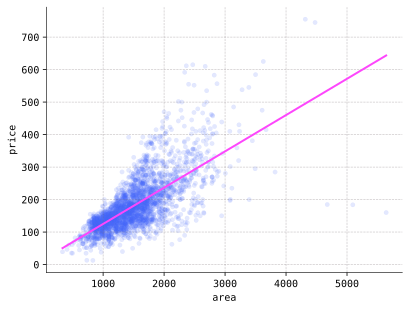

In [2]:
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
plt.style.use('../aux-files/custom_style_light.mplstyle')
magenta = '#FD46FC'

lr = smf.ols(formula='price ~ area', data=df).fit()
beta_0, beta_1 = lr.params

min_data = df['area'].min()
max_data = df['area'].max()
grid = np.linspace(min_data, max_data)
df.plot(kind='scatter', x='area', y='price', alpha=0.15)
plt.plot(grid, beta_0 + beta_1 * grid, color=magenta)
plt.show()

In general, the random variables

$$
\epsilon^{(i)} = Y^{(i)} - \mu^{(i)}
$$

in a linear regression model are called the _error terms_. Note then that

$$
Y^{(i)} = \beta_0 + \beta_1 x_1^{(i)} + \cdots + \beta_n x_n^{(i)} + \epsilon^{(i)}
$$

and $\epsilon^{(i)} \sim \mathcal{N}\big( 0,\sigma^2\big)$ for each $i=1,\ldots,m$. The assumption built into the linear regression model that the error terms all share the same variance is called _homoscedasticity_. If we have observed values $y^{(1)},\ldots,y^{(m)}$, then the differences

$$
y^{(i)} - \hat{y}^{(i)}
$$ (resid-eqn)

are observed values of the error terms, where

$$
\hat{y}^{(i)} \stackrel{\text{def}}{=} \mu^{(i)} = \beta_0 + \beta_1x_1^{(i)} + \cdots + \beta_n x_n^{(i)}
$$

are the _predicted values_ of the $y^{(i)}$'s. The differences {eq}`resid-eqn` are called the _residuals_ of the observed values.

Based on the scatter plot above, it is apparent that the homoscedasticity assumption is violated in the Ames dataset. This is made even more apparent by plotting the residuals against the predictor variable:

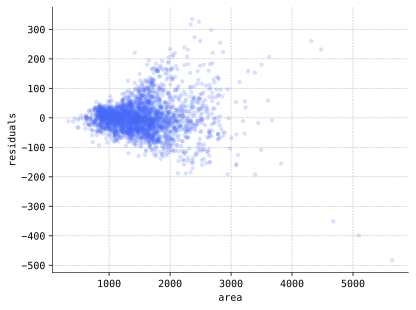

In [3]:
resid = lr.resid
plt.scatter(x=df['area'], y=resid, alpha=0.20)
plt.xlabel('area')
plt.ylabel('residuals')
plt.show()

Indeed, the distributions of the residuals appear to widen as the area variable increases.

As with the parameter vector $\boldsymbol{\beta}$, it is also possible to estimate an "optimal" value of the variance $\sigma^2$ in the linear regression model for the Ames dataset. Given these parameters, we may then generate new datasets by sampling from the normal distributions

$$
\mathcal{N}\big(\mu^{(i)}, \sigma^2\big)
$$

for each $i=1,2,\ldots,2{,}930$. It is interesting to produce scatter plots of a few generated datasets and compare their shape to the real dataset above:

In [4]:
import scipy as sp
from itertools import product

np.random.seed(42)
sigma = np.sqrt(lr.scale)
y_hat = lr.predict()

_, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6), sharex=True, sharey=True)
for i, j in product(range(2), range(2)):
    y_gen = sp.stats.norm(loc=y_hat, scale=sigma).rvs(2930)
    df_gen = pd.DataFrame({'area': df['area'], 'price': y_gen})
    df_gen.plot(kind='scatter', x='area', y='price', alpha=0.15, ax=axes[i, j])
    axes[i, j].plot(grid, beta_0 + beta_1 * grid, color=magenta)
axes[0, 0].set_title(f'generated dataset 1')
axes[0, 1].set_title(f'generated dataset 2')
axes[1, 0].set_title(f'generated dataset 3')
axes[1, 1].set_title(f'generated dataset 4')
plt.tight_layout()

The lines in these plots are copies of the original regression line. The residuals for these generated datasets look as follows:

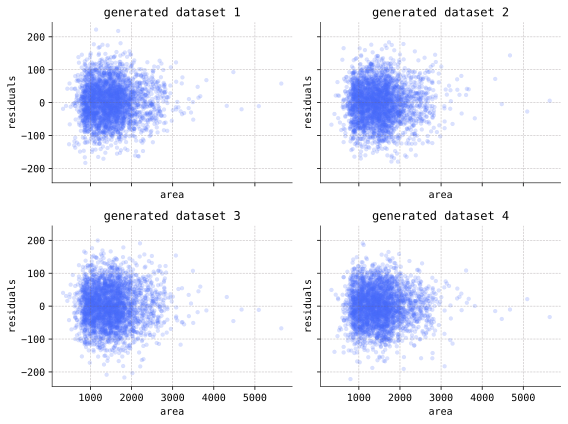

In [5]:
import scipy as sp
from itertools import product

np.random.seed(42)

_, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6), sharex=True, sharey=True)
for i, j in product(range(2), range(2)):
    y_gen = sp.stats.norm(loc=y_hat, scale=sigma).rvs(2930)
    df_gen = pd.DataFrame({'area': df['area'], 'price': y_gen})
    y_hat = lr.predict(df_gen)
    resid = y_gen - y_hat
    axes[i, j].scatter(x=df['area'], y=resid, alpha=0.20)
    axes[i, j].set_xlabel('area')
    axes[i, j].set_ylabel('residuals')
axes[0, 0].set_title(f'generated dataset 1')
axes[0, 1].set_title(f'generated dataset 2')
axes[1, 0].set_title(f'generated dataset 3')
axes[1, 1].set_title(f'generated dataset 4')
plt.tight_layout()

This is a form of _model checking_: By generating new data from the model and comparing to the original data, we are checking to see how well our model matches the real data. 


### Logistic regression

The only difference between the linear regression models studied in the previous section and the _logistic regression models_ studied in this one are the assumed forms of distributions of the IID random sample.

````{prf:definition}

A _logistic regression model_ is a probabilistic graphical model whose underlying graph is of the form

```{image} ../img/log-reg-01.svg
:width: 50%
:align: center
```
&nbsp;

The deterministic vectors $\mathbf{x}^{(i)} = \big(x_1^{(i)},\ldots,x_n^{(n)}\big)$ have no restrictions on their componenets, as well as the parameter vector $\boldsymbol\beta=(\beta_0,\beta_1,\ldots,\beta_n)$. For each $i=1,\ldots,m$, we have

$$
Y^{(i)} ; \mathbf{x}^{(i)}, \boldsymbol\beta \sim \mathcal{B}er\big(\phi^{(i)}\big),
$$

where

$$
\phi^{(i)} = \sigma\big(\beta_0 + \beta_1 x_1^{(i)} + \cdots + \beta_n x_n^{(i)}\big)
$$

and $\sigma: \mathbb{R} \to \mathbb{R}$ is the _logistic function_ (or _sigmoid function_) defined as

$$
\sigma(z) = \frac{1}{1+e^{-z}}.
$$

````

It follows that the joint density function of a logistic regression model factors as

$$
p( \mathbf{y}; \mathbf{x}^{(1)},\ldots, \mathbf{x}^{(m)}, \boldsymbol\beta) = \prod_{i=1}^m p\big( y^{(i)}; \mathbf{x}^{(i)}, \boldsymbol\beta\big) = \prod_{i=1}^m \big(\phi^{(i)}\big)^{y^{(i)}} \big(1 - \phi^{(i)}\big)^{1 - \phi^{(i)}}.
$$










### Markov models

### Gaussian mixture models

## Gradient-based optimization

### Vanilla gradient descent

### Stochastic gradient descent (SGD)

## Maximum likelihood estimation (MLE)

### The basics

(mle-lin-reg-sec)=
### MLE for linear regression

### MLE for logistic regression

### MLE for Markov models

## Expectation maximization (EM)

### Vanilla EM

### Monte Carlo EM (MCEM)

### EM for Gaussian mixture models